In [13]:
import numpy as np
import scipy
import pandas as pd
import utils
from utils import HouseHolder, QR, SVD,pic_deblur1
import scipy.io
import scipy.linalg
from PIL import Image
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot as plt
import time
from sklearn import preprocessing

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
#read the pricture
def open_picture(size:str,name:str):
    path = './test_images/'+size+'_'+size+'_'+name 
    try:   
        im = Image.open(path+'.png')
    except:
        im = Image.open(path+'.jpg')      
    img = np.array(im)
    img = img.astype(np.float64) / 255
    return img

In [14]:
def working_procee(size,name,blur_type,power,trunc,deblur_tpye):
    img_data = open_picture(size,name)
    #plt.imshow(img_data)
    blur_kernel,blur_data = pic_deblur1.blur_picture(img_data,blur_type,power)
    begin = time.time()
    deblur_data,psnr,time_svd = pic_deblur1.deblur_picture(blur_kernel,blur_data,trunc,deblur_tpye)
    time_used = time.time()-begin
    data = [img_data,blur_data,deblur_data]
    result_df = pd.DataFrame()
    result_df['time_used_for_deblurring'] = [time_used]
    result_df['average_psnr'] = [psnr]
    result_df['time_used_for_svd_l'] = [time_svd[0]]
    result_df['time_used_for_svd_r'] = [time_svd[1]]
    return data,blur_kernel,result_df

In [125]:
data,blur_kernel,result_df = working_procee('512','ducks',['tridiagonal','tridiagonal'],[4,4],200,['B1','B1'])

phaseI: 3.1179862022399902


LinAlgError: 423-th leading minor not positive definite

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


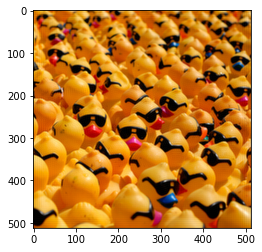

In [124]:
plt.imshow(data[2])

In [118]:
result_df

,time_used_for_deblurring,average_psnr,time_used_for_svd_l,time_used_for_svd_r
0,11.683949,7.763641,5.155174,4.94895


### draw the singular value

phaseI: 2.1926510334014893
phaseII: 3.8240718841552734
phaseI: 1.8332669734954834
phaseII: 3.9217729568481445


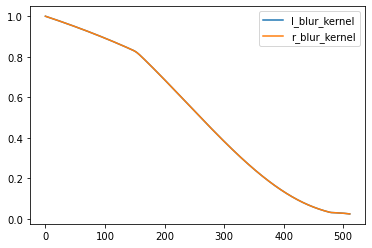

In [121]:
pic_deblur1.singular_drawing(blur_kernel,['B1'])

phaseI: 2.1489219665527344
phaseII: 4.528976202011108
phaseI: 1.8618087768554688
phaseII: 4.9217751026153564


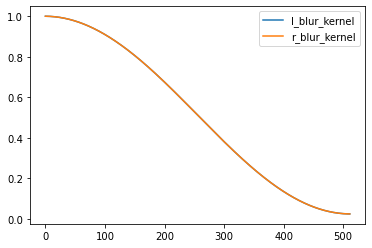

In [122]:
pic_deblur1.singular_drawing(blur_kernel,['A'])